In [13]:
from collections import defaultdict
import os
import csv
from datetime import datetime

csv_dir = "../log/ms-marco/vectors-colbert/k10_s1K_v137K"
data_dict = defaultdict(list)

for csv_name in os.listdir(csv_dir):
    if not csv_name.endswith(".csv"):
        continue

    algm, _, time = csv_name[:-4].partition("-search-")

    filepath = os.path.join(csv_dir, csv_name)
    with open(filepath, newline="", encoding="utf-8") as f:
        reader = csv.reader(f)
        next(reader, None)
        records = [tuple(map(int, row)) for row in reader]

    data_dict[algm].append((time, records))

for algm in data_dict:
    data_dict[algm].sort(key=lambda x: x[0], reverse=True)

data_dict

defaultdict(list,
            {'brute_force': [('251024-132720',
               [(0, 972980, 1000, 1000, 100, 0, 0)]),
              ('251024-132435', [(0, 953789, 1000, 1000, 100, 0, 0)])],
             'ivfpq': [('251024-134508',
               [(10, 143663, 711, 1000, 100, 0, 0),
                (20, 127519, 844, 1000, 100, 0, 0),
                (50, 209848, 942, 1000, 100, 0, 0),
                (100, 325088, 979, 1000, 100, 0, 0),
                (200, 473672, 994, 1000, 100, 0, 0),
                (500, 727448, 999, 1000, 100, 0, 0),
                (1000, 926333, 1000, 1000, 100, 0, 0)]),
              ('251024-133156',
               [(10, 307169, 711, 1000, 100, 0, 0),
                (20, 158521, 844, 1000, 100, 0, 0),
                (50, 315715, 942, 1000, 100, 0, 0),
                (100, 447921, 979, 1000, 100, 0, 0),
                (200, 474619, 994, 1000, 100, 0, 0),
                (500, 742852, 999, 1000, 100, 0, 0),
                (1000, 953196, 1000, 1000, 100, 0

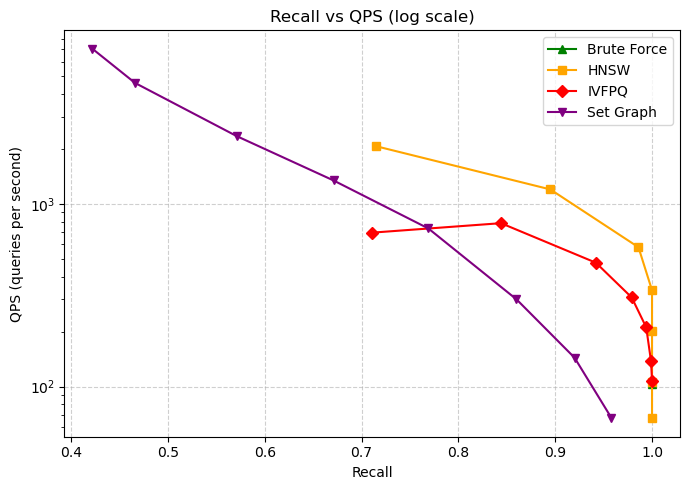

In [14]:
import matplotlib.pyplot as plt


plot_styles = {
    "brute_force": {"color": "green", "marker": "^", "label": "Brute Force"},
    "hnsw": {"color": "orange", "marker": "s", "label": "HNSW"},
    "ivfpq": {"color": "red", "marker": "D", "label": "IVFPQ"},
    "set": {"color": "purple", "marker": "v", "label": "Set Graph"},
    # "sequence": {"color": "blue", "marker": "o", "label": "Sequence Graph"},
    # "old": {"color": "cyan", "marker": "<", "label": "Sequence Graph Try"},
    # "my_hnsw": {"color": "magenta", "marker": ">", "label": "My HNSW"},
}


def get_records(algm, index):
    if isinstance(index, int):
        return data_dict[algm][index][1]
    elif isinstance(index, str):
        for time, records in data_dict[algm]:
            if time == index:
                return records


def extract_xy(records):
    recall = [r[2] / r[3] for r in records]
    qps = [r[4] / (r[1] / 1e6) for r in records]
    return recall, qps


plt.figure(figsize=(7, 5))

for algm, style in plot_styles.items():
    records = get_records(algm, style.get("time", 0))
    recall, qps = extract_xy(records)
    plt.plot(recall, qps, marker=style["marker"], color=style["color"], label=style["label"], linewidth=1.5)

plt.xlabel("Recall")
plt.ylabel("QPS (queries per second)")
plt.yscale("log")
plt.title("Recall vs QPS (log scale)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [15]:
import matplotlib.pyplot as plt

plot_styles = {
    "dtw": {"color": "blue", "marker": "o", "label": "DTW"},
    "my_hnsw": {"color": "red", "marker": "s", "label": "My HNSW"},
}


def extract_metrics(records):
    ef_values = [r[0] for r in records]
    hops = [r[5] / r[4] for r in records]
    dists = [r[6] / r[4] for r in records]
    return ef_values, hops, dists


fig, ax1 = plt.subplots(figsize=(7, 5))
ax2 = ax1.twinx()

for algm, style in plot_styles.items():
    records = data_dict[algm + "_search"]
    ef, hops, dists = extract_metrics(records)

    x = range(len(ef))
    ax1.plot(x, hops, marker=style["marker"], color=style["color"], linestyle="-", label=f"{style['label']}")
    ax2.plot(x, dists, marker=style["marker"], color=style["color"], linestyle="--", label=f"{style['label']}")

ax1.set_xlabel("ef")
ax1.set_ylabel("Avg Hops")
ax1.set_yscale("log")
ax2.set_ylabel("Avg DistComps")
ax2.set_yscale("log")

ax1.legend(loc="upper left", fontsize=9)

ax1.grid(True, linestyle="--", alpha=0.5)
plt.title("Comparison of Hops and Distance Computations vs ef")
plt.tight_layout()
plt.show()

ValueError: Data has no positive values, and therefore cannot be log-scaled.

Error in callback <function _draw_all_if_interactive at 0x7f95ccad0a40> (for post_execute), with arguments args (),kwargs {}:


ValueError: Data has no positive values, and therefore cannot be log-scaled.

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 700x500 with 2 Axes>